In [4]:
import glob
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from qiskit import *
from qiskit.quantum_info import Statevector

import dqva

from utils.graph_funcs import *
from utils.helper_funcs import *

from ansatz import qaoa, qv_ansatz, dqv_ansatz, dqv_cut_ansatz

In [2]:
test_graphs = glob.glob('benchmark_graphs/N8_p20_graphs/*')
test_graphs = sorted(test_graphs, key=lambda g: int(g.split('/')[-1].strip('G.txt')))
print(len(test_graphs))

50


benchmark_graphs/N8_p20_graphs/G1.txt
Optimal: ('01011001', 4)


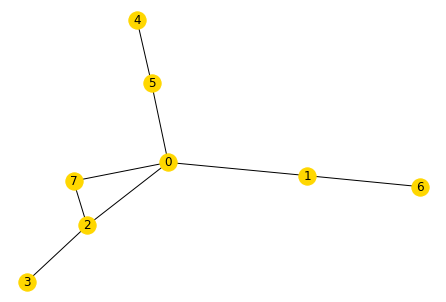

In [3]:
graph = test_graphs[0]
print(graph)
G = graph_from_file(graph)
print('Optimal:', brute_force_search(G))
nx.draw_spring(G, with_labels=True, node_color='gold')

In [14]:
sample_graphs = test_graphs[1:3]
print(sample_graphs)

['benchmark_graphs/N8_p20_graphs/G2.txt', 'benchmark_graphs/N8_p20_graphs/G3.txt']


In [15]:
qaoa_data = {}

for graph_name in sample_graphs:
    print(graph_name)
    G = graph_from_file(graph_name)
    nq = len(G.nodes())
    opt_mis = brute_force_search(G)[1]
    init_state = '0'*nq
    
    graph_key = graph_name.split('/')[-1].strip('.txt')
    graph_data = []
    
    for P in [1,2,3]:
        output = dqva.solve_mis_qaoa(init_state, G, P=P, sim='qasm')
        ap_ratio = hamming_weight(output[0]) / opt_mis
        gate_count = 3 * nq * P
        print('-'*30)
        print('Found approximation ratio = {}, with {} multi-qubit gates'.format(ap_ratio, gate_count))
        print('-'*30)
        graph_data.append((gate_count, ap_ratio))
    
    qaoa_data[graph_key] = graph_data

benchmark_graphs/N8_p20_graphs/G2.txt
Start round 1.1, Initial state = 00000000
	Num params = 2
	Current Mixer Order: [2, 6, 4, 1, 0, 7, 5, 3]
	Optimal cost: -4.0
	Found new independent set: 01100110, Hamming weight = 4
Start round 1.2, Initial state = 01100110
	Num params = 2
	Current Mixer Order: [2, 6, 4, 1, 0, 7, 5, 3]
	Optimal cost: -4.0
	None of the measured bitstrings had higher Hamming weight than: 01100110
	RETURNING, best hamming weight: 4
------------------------------
Found approximation ratio = 0.8, with 24 multi-qubit gates
------------------------------
Start round 1.1, Initial state = 00000000
	Num params = 4
	Current Mixer Order: [4, 2, 3, 5, 0, 7, 1, 6]
	Optimal cost: -4.999267578125
	Found new independent set: 11001011, Hamming weight = 5
Start round 1.2, Initial state = 11001011
	Num params = 4
	Current Mixer Order: [4, 2, 3, 5, 0, 7, 1, 6]
	Optimal cost: -5.0
	None of the measured bitstrings had higher Hamming weight than: 11001011
	RETURNING, best hamming weight: 

In [16]:
print(qaoa_data)

{'G2': [(24, 0.8), (48, 1.0), (72, 1.0)], 'G3': [(24, 1.0), (48, 1.0), (72, 1.0)]}


In [ ]:
qaoa_data